# Black Lives Matter in the News: Data Collection and Sentiment Analysis
An exploration of how the news has been portrayed the Black Lives Matter movement and other conflicting movements including Blue Lives Matter and All Lives matter over the past month. My project is composed of multiple Jupyter notebooks to collect data, analyze the sentiment of the news and visualize the reseach I completed. 

### Research Question:
How does the news portray the Black Lives Matter and other counter-movements including All Lives Matter and Blue Lives Matter in the headlines they choose to share and words they use to describe events? 

#### Goal:
To better understand if the news encourages societal change and reflects the general public's perspective towards these specific movements. Additionally, I would like to compare how often the news publishes articles regarding to Black Lives Matter, All Lives Matter, and Blue Lives Matter.

#### Methods:
    1. Data Collection:
    Scrape web data from multiple news sources with a program that runs automatically everyday. A Raspberry Pi is in charge of running these programs and uploading the findings to a google sheet. All together three python scripts collect news data from Google, Bing, and Yahoo.
    
    2. Sentiment Analysis:
    Implemented natural language processing in the form of sentiment analysis. Used both NLTK Vader and text blob  to quickly and easily attain positive and negative sentiment values for title and descriptions of articles. 
    
    3. Visualization:
    With these sentiment values, I used MatPlotLib to make graphs comparing the sentiment of all three movements. Specifically, I looked at how sentiment changed over time and how often articles were published for each of the three movements.


In [1]:
import gspread
from oauth2client.service_account import ServiceAccountCredentials
import pandas as pd
import datetime
import pytz
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 
from textblob import TextBlob, Word, Blobber
import seaborn as sns

In [2]:
scope = ['https://www.googleapis.com/auth/drive']
creds = ServiceAccountCredentials.from_json_keyfile_name("creds.json", scope)
client = gspread.authorize(creds)
sheet = client.open("DIGHUM Sentiment").worksheet("GoogleNews")
googleDF = pd.DataFrame(sheet.get_all_records())
#Converting string dates to datetime objects
googleDF['date'] = [pytz.utc.localize(datetime.datetime.strptime(d, '%a, %d %b %Y %H:%M:%S %Z')) for d in list(googleDF['date'])]
googleDF



,query,date,source,title,description
0,Black Lives Matter,2020-07-05 20:30:25+00:00,The Associated Press,Facebook groups pivot to attacks on Black Live...,Facebook groups pivot to attacks on Black Live...
1,Black Lives Matter,2020-07-05 13:00:13+00:00,The Verge,33 powerful Black Lives Matter murals - The Verge,33 powerful Black Lives Matter murals
2,Black Lives Matter,2020-07-05 16:32:04+00:00,ABC News,Protester dies after struck by speeding car at...,Protester dies after struck by speeding car at...
3,Black Lives Matter,2020-07-05 20:26:19+00:00,NBC Bay Area,2 People Paint Over Black Lives Matter Mural i...,2 People Paint Over Black Lives Matter Mural i...
4,Black Lives Matter,2020-07-05 10:46:00+00:00,The Conversation CA,Black Lives Matter movement finds new urgency ...,Black Lives Matter movement finds new urgency ...
...,...,...,...,...,...
5604,Blue Lives Matter,2020-06-14 15:27:12+00:00,BabyGaga,The Most Controversial Baby Names Of 2020 | Ba...,The Most Controversial Baby Names Of 2020 | Ba...
5605,Blue Lives Matter,2020-06-15 00:08:26+00:00,TheNewsTrace,Blue Peter delivers powerful message for kids ...,Blue Peter delivers powerful message for kids ...
5606,Blue Lives Matter,2020-06-14 19:52:00+00:00,New Haven Register,Egypt: Ethiopia rejecting 'fundamental issues'...,Egypt: Ethiopia rejecting 'fundamental issues'...
5607,Blue Lives Matter,2020-06-14 14:00:00+00:00,The Canberra Times,Why not build a hydrotherapy pool to service C...,Why not build a hydrotherapy pool to service C...


In [3]:
sheet = client.open("DIGHUM Sentiment").worksheet("YahooNews")
yahooDF = pd.DataFrame(sheet.get_all_records())
yahooDF['date'] = [datetime.datetime.strptime(d, '%a, %d %b %Y %H:%M:%S %z') for d in list(yahooDF['date'])]
yahooDF

,query,date,source,title,description
0,Black Lives Matter,2020-07-04 12:56:45-04:00,CBS News,Biden evokes MLK and George Floyd in Fourth of...,Biden&#39;s video message came hours after Pre...
1,Black Lives Matter,2020-07-03 08:49:03-04:00,The Independent,Judge blocks Portland police from using physic...,As protests originally sparked by the death of...
2,Black Lives Matter,2020-07-03 16:56:49-04:00,Associated Press,Epstein cohort&#39;s arrest becomes new test f...,Could that same deal now help Ghislaine Maxwel...
3,Black Lives Matter,2020-07-03 03:39:02-04:00,Business Insider,A massive economic crisis and the coronavirus ...,There are estimates from the World Bank that 7...
4,Black Lives Matter,2020-07-03 05:30:00-04:00,The National Interest,It Would Cost Trillions: The Day North Korea C...,"The prospect of a peaceful Korean Unification,..."
...,...,...,...,...,...
2922,Blue Lives Matter,2020-06-13 20:58:21-04:00,The Daily Beast,Trump’s Deployment of National Guard to Deal W...,"Germany’s R-rate, the crucial metric used to d..."
2923,Blue Lives Matter,2020-06-14 13:58:50-04:00,The Telegraph,Germany&#39;s R-rate spikes above 1 ahead of t...,El Salvador's president says that a stringent ...
2924,Blue Lives Matter,2020-06-14 11:12:25-04:00,Associated Press,Virus lockdown ends in El Salvador amid clash ...,China reported dozens of new coronavirus cases...
2925,Blue Lives Matter,2020-06-15 00:51:05-04:00,AFP,China virus cluster grows as European borders ...,"“We’re relentless,” one school principal said...."


In [4]:
sheet = client.open("DIGHUM Sentiment").worksheet("BingNews")
bingDF = pd.DataFrame(sheet.get_all_records())
bingDF['date'] = [pytz.utc.localize(datetime.datetime.strptime(d, '%a, %d %b %Y %H:%M:%S %Z')) for d in list(bingDF['date'])]
bingDF

,query,date,source,title,description
0,Black Lives Matter,2020-07-04 16:47:57+00:00,Boston Herald on MSN.com,Black Lives Matter,Hundreds of people gathered on the Fourth of J...
1,Black Lives Matter,2020-07-04 21:00:00+00:00,deseret on MSN.com,‘Say her name’: Boston Black Lives Matter prot...,Senior safety says he is as healthy as he’s ev...
2,Black Lives Matter,2020-07-04 18:38:00+00:00,ESPN,BYU safety Troy Warner pleased with how teamma...,The NBA is planning to paint Black Lives Matte...
3,Black Lives Matter,2020-07-04 20:13:00+00:00,San Diego Union-Tribune,"Sources: NBA, union plan to paint 'Black Lives...","On a day that celebrates American freedom, Bla..."
4,Black Lives Matter,2020-07-04 17:27:00+00:00,deseret,Black Lives Matter protesters proclaim not all...,"Since the start of the protest movement, Black..."
...,...,...,...,...,...
732,Blue Lives Matter,2020-06-05 21:41:00+00:00,The Daily Beast,Third weekend of protests opposed by 'Blue Liv...,"During a series of tense all-hands meetings, e..."
733,Blue Lives Matter,2020-06-12 18:36:00+00:00,Newsweek,Staff Calls for Shutdown of Sports Illustrated...,Warriors for Christ is considered an extremist...
734,Blue Lives Matter,2020-06-14 20:23:00+00:00,Daily Mail,"Hate Group Sues D.C. Mayor Over Street Mural, ...",The 'highly inappropriate' shirts which also h...
735,Blue Lives Matter,2020-06-09 16:34:00+00:00,Sacramento Bee,Policeman sacked and 17 other officers under i...,A Greenhaven resident tied blue ribbons on tre...


In [5]:
def addSentimentValues(df):
    start = datetime.datetime.now()
    analyzer = SentimentIntensityAnalyzer()
    titleNegatives = []
    titleNeutrals = []
    titlePositives = []
    titleCompounds = []
    descriptionPositives = []
    descriptionNeutrals = []
    descriptionNegatives = []
    
    descriptionCompounds = []
    titleTBsentiments = []
    descriptionTBsentiments = []
    titleTBsubjectivitys = []
    descriptionTBsubjectivitys = []
    for i in range(len(df['description'])):
        title = df['title'][i]
        description = df['description'][i]

        titleAnalysis = analyzer.polarity_scores(title)

        titleNegatives.append(titleAnalysis['neg'])
        titleNeutrals.append(titleAnalysis['neu'])
        titlePositives.append(titleAnalysis['pos'])
        titleCompounds.append(titleAnalysis['compound'])
    
    
        descriptionAnalysis = analyzer.polarity_scores(description)
        
        descriptionNegatives.append(descriptionAnalysis['neg'])
        descriptionNeutrals.append(descriptionAnalysis['neu'])
        descriptionPositives.append(descriptionAnalysis['pos'])
        descriptionCompounds.append(descriptionAnalysis['compound'])
        
        
        titleTB = TextBlob(title).sentiment
        descriptionTB = TextBlob(description).sentiment
        
        titleTBsentiments.append(titleTB.polarity)
        descriptionTBsentiments.append(descriptionTB.polarity)
        titleTBsubjectivitys.append(titleTB.subjectivity)
        descriptionTBsubjectivitys.append(titleTB.subjectivity)
    df['title negative'] = titleNegatives
    df['title neutral'] = titleNeutrals
    df['title positive'] = titlePositives
    df['title compound'] = titleCompounds
    df['description negative'] = descriptionNegatives
    df['description neutral'] = descriptionNeutrals
    df['description positive'] = descriptionPositives
    df['description compound'] = descriptionCompounds
    df['tb title sentiment'] = titleTBsentiments
    df['tb title subjectivity'] = titleTBsubjectivitys
    df['tb description sentiment' ] = descriptionTBsentiments
    df['tb description subjectivity'] = descriptionTBsentiments
    end2 = datetime.datetime.now()
    change2 = end2 - start
    return df

In [6]:
googleDf = addSentimentValues(googleDF)
yahooDf = addSentimentValues(yahooDF)
bingDf = addSentimentValues(bingDF)

In [7]:
googleDf

,query,date,source,title,description,title negative,title neutral,title positive,title compound,description negative,description neutral,description positive,description compound,tb title sentiment,tb title subjectivity,tb description sentiment,tb description subjectivity
0,Black Lives Matter,2020-07-05 20:30:25+00:00,The Associated Press,Facebook groups pivot to attacks on Black Live...,Facebook groups pivot to attacks on Black Live...,0.193,0.733,0.073,-0.4215,0.264,0.636,0.100,-0.4215,-0.166667,0.433333,-0.166667,-0.166667
1,Black Lives Matter,2020-07-05 13:00:13+00:00,The Verge,33 powerful Black Lives Matter murals - The Verge,33 powerful Black Lives Matter murals,0.000,0.642,0.358,0.4404,0.000,0.506,0.494,0.4404,0.066667,0.716667,0.066667,0.066667
2,Black Lives Matter,2020-07-05 16:32:04+00:00,ABC News,Protester dies after struck by speeding car at...,Protester dies after struck by speeding car at...,0.102,0.711,0.188,-0.0772,0.120,0.659,0.222,-0.0772,-0.166667,0.433333,-0.166667,-0.166667
3,Black Lives Matter,2020-07-05 20:26:19+00:00,NBC Bay Area,2 People Paint Over Black Lives Matter Mural i...,2 People Paint Over Black Lives Matter Mural i...,0.000,0.922,0.078,0.0258,0.000,0.891,0.109,0.0258,-0.166667,0.433333,-0.166667,-0.166667
4,Black Lives Matter,2020-07-05 10:46:00+00:00,The Conversation CA,Black Lives Matter movement finds new urgency ...,Black Lives Matter movement finds new urgency ...,0.000,0.932,0.068,0.0258,0.000,0.909,0.091,0.0258,-0.015152,0.443939,-0.015152,-0.015152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5604,Blue Lives Matter,2020-06-14 15:27:12+00:00,BabyGaga,The Most Controversial Baby Names Of 2020 | Ba...,The Most Controversial Baby Names Of 2020 | Ba...,0.173,0.827,0.000,-0.2716,0.207,0.793,0.000,-0.2716,0.525000,0.725000,0.525000,0.525000
5605,Blue Lives Matter,2020-06-15 00:08:26+00:00,TheNewsTrace,Blue Peter delivers powerful message for kids ...,Blue Peter delivers powerful message for kids ...,0.205,0.600,0.195,-0.2960,0.228,0.556,0.217,-0.2960,0.044444,0.511111,0.044444,0.044444
5606,Blue Lives Matter,2020-06-14 19:52:00+00:00,New Haven Register,Egypt: Ethiopia rejecting 'fundamental issues'...,Egypt: Ethiopia rejecting 'fundamental issues'...,0.214,0.786,0.000,-0.4588,0.300,0.700,0.000,-0.4588,0.136364,0.454545,0.000000,0.000000
5607,Blue Lives Matter,2020-06-14 14:00:00+00:00,The Canberra Times,Why not build a hydrotherapy pool to service C...,Why not build a hydrotherapy pool to service C...,0.000,1.000,0.000,0.0000,0.000,1.000,0.000,0.0000,0.000000,0.000000,0.000000,0.000000


In [8]:
yahooDf

,query,date,source,title,description,title negative,title neutral,title positive,title compound,description negative,description neutral,description positive,description compound,tb title sentiment,tb title subjectivity,tb description sentiment,tb description subjectivity
0,Black Lives Matter,2020-07-04 12:56:45-04:00,CBS News,Biden evokes MLK and George Floyd in Fourth of...,Biden&#39;s video message came hours after Pre...,0.000,1.000,0.0,0.0000,0.125,0.699,0.176,0.4019,0.000000,0.000000,0.400000,0.400000
1,Black Lives Matter,2020-07-03 08:49:03-04:00,The Independent,Judge blocks Portland police from using physic...,As protests originally sparked by the death of...,0.174,0.826,0.0,-0.2263,0.155,0.824,0.021,-0.8555,0.000000,0.142857,0.287500,0.287500
2,Black Lives Matter,2020-07-03 16:56:49-04:00,Associated Press,Epstein cohort&#39;s arrest becomes new test f...,Could that same deal now help Ghislaine Maxwel...,0.231,0.769,0.0,-0.3400,0.125,0.845,0.030,-0.8820,0.043182,0.227273,0.040530,0.040530
3,Black Lives Matter,2020-07-03 03:39:02-04:00,Business Insider,A massive economic crisis and the coronavirus ...,There are estimates from the World Bank that 7...,0.240,0.760,0.0,-0.6249,0.142,0.858,0.000,-0.5106,0.100000,0.600000,0.000000,0.000000
4,Black Lives Matter,2020-07-03 05:30:00-04:00,The National Interest,It Would Cost Trillions: The Day North Korea C...,"The prospect of a peaceful Korean Unification,...",0.216,0.784,0.0,-0.2960,0.065,0.673,0.262,0.9633,0.000000,0.000000,0.145455,0.145455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2922,Blue Lives Matter,2020-06-13 20:58:21-04:00,The Daily Beast,Trump’s Deployment of National Guard to Deal W...,"Germany’s R-rate, the crucial metric used to d...",0.128,0.872,0.0,-0.2263,0.050,0.884,0.066,0.8130,0.000000,0.000000,0.107556,0.107556
2923,Blue Lives Matter,2020-06-14 13:58:50-04:00,The Telegraph,Germany&#39;s R-rate spikes above 1 ahead of t...,El Salvador's president says that a stringent ...,0.000,1.000,0.0,0.0000,0.080,0.861,0.059,-0.2023,0.000000,0.100000,0.066667,0.066667
2924,Blue Lives Matter,2020-06-14 11:12:25-04:00,Associated Press,Virus lockdown ends in El Salvador amid clash ...,China reported dozens of new coronavirus cases...,0.000,1.000,0.0,0.0000,0.071,0.877,0.052,-0.4767,0.000000,0.000000,0.040909,0.040909
2925,Blue Lives Matter,2020-06-15 00:51:05-04:00,AFP,China virus cluster grows as European borders ...,"“We’re relentless,” one school principal said....",0.000,1.000,0.0,0.0000,0.000,0.887,0.113,0.3182,0.000000,0.000000,0.500000,0.500000


In [9]:
bingDf

,query,date,source,title,description,title negative,title neutral,title positive,title compound,description negative,description neutral,description positive,description compound,tb title sentiment,tb title subjectivity,tb description sentiment,tb description subjectivity
0,Black Lives Matter,2020-07-04 16:47:57+00:00,Boston Herald on MSN.com,Black Lives Matter,Hundreds of people gathered on the Fourth of J...,0.000,0.645,0.355,0.0258,0.150,0.771,0.079,-0.4588,-0.166667,0.433333,-0.083333,-0.083333
1,Black Lives Matter,2020-07-04 21:00:00+00:00,deseret on MSN.com,‘Say her name’: Boston Black Lives Matter prot...,Senior safety says he is as healthy as he’s ev...,0.451,0.489,0.060,-0.8020,0.073,0.760,0.167,0.4767,-0.166667,0.433333,0.500000,0.500000
2,Black Lives Matter,2020-07-04 18:38:00+00:00,ESPN,BYU safety Troy Warner pleased with how teamma...,The NBA is planning to paint Black Lives Matte...,0.000,0.618,0.382,0.7003,0.000,0.972,0.028,0.0258,0.166667,0.716667,-0.155556,-0.155556
3,Black Lives Matter,2020-07-04 20:13:00+00:00,San Diego Union-Tribune,"Sources: NBA, union plan to paint 'Black Lives...","On a day that celebrates American freedom, Bla...",0.000,0.916,0.084,0.0258,0.046,0.671,0.283,0.8720,-0.166667,0.433333,0.170833,0.170833
4,Black Lives Matter,2020-07-04 17:27:00+00:00,deseret,Black Lives Matter protesters proclaim not all...,"Since the start of the protest movement, Black...",0.313,0.612,0.075,-0.5426,0.194,0.769,0.037,-0.5719,0.077778,0.411111,-0.083333,-0.083333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
732,Blue Lives Matter,2020-06-05 21:41:00+00:00,The Daily Beast,Third weekend of protests opposed by 'Blue Liv...,"During a series of tense all-hands meetings, e...",0.190,0.700,0.110,-0.2023,0.209,0.791,0.000,-0.5423,0.000000,0.050000,-0.333333,-0.333333
733,Blue Lives Matter,2020-06-12 18:36:00+00:00,Newsweek,Staff Calls for Shutdown of Sports Illustrated...,Warriors for Christ is considered an extremist...,0.000,1.000,0.000,0.0000,0.292,0.708,0.000,-0.7906,0.000000,0.100000,-0.300000,-0.300000
734,Blue Lives Matter,2020-06-14 20:23:00+00:00,Daily Mail,"Hate Group Sues D.C. Mayor Over Street Mural, ...",The 'highly inappropriate' shirts which also h...,0.231,0.594,0.175,-0.4019,0.000,0.956,0.044,0.0258,-0.483333,0.666667,0.080000,0.080000
735,Blue Lives Matter,2020-06-09 16:34:00+00:00,Sacramento Bee,Policeman sacked and 17 other officers under i...,A Greenhaven resident tied blue ribbons on tre...,0.000,0.927,0.073,0.0258,0.050,0.803,0.147,0.6369,-0.062500,0.237500,0.000000,0.000000


In [10]:
import matplotlib.pyplot as plt

In [11]:
googleDF['search engine'] = ['Google'] * len(googleDF['date'])
yahooDF['search engine'] = ['Yahoo'] * len(yahooDF['date'])
bingDF['search engine'] = ['Bing'] * len(bingDF['date'])

In [12]:
allData = pd.concat([googleDF, yahooDF, bingDF])

In [13]:
allData

,query,date,source,title,description,title negative,title neutral,title positive,title compound,description negative,description neutral,description positive,description compound,tb title sentiment,tb title subjectivity,tb description sentiment,tb description subjectivity,search engine
0,Black Lives Matter,2020-07-05 20:30:25+00:00,The Associated Press,Facebook groups pivot to attacks on Black Live...,Facebook groups pivot to attacks on Black Live...,0.193,0.733,0.073,-0.4215,0.264,0.636,0.100,-0.4215,-0.166667,0.433333,-0.166667,-0.166667,Google
1,Black Lives Matter,2020-07-05 13:00:13+00:00,The Verge,33 powerful Black Lives Matter murals - The Verge,33 powerful Black Lives Matter murals,0.000,0.642,0.358,0.4404,0.000,0.506,0.494,0.4404,0.066667,0.716667,0.066667,0.066667,Google
2,Black Lives Matter,2020-07-05 16:32:04+00:00,ABC News,Protester dies after struck by speeding car at...,Protester dies after struck by speeding car at...,0.102,0.711,0.188,-0.0772,0.120,0.659,0.222,-0.0772,-0.166667,0.433333,-0.166667,-0.166667,Google
3,Black Lives Matter,2020-07-05 20:26:19+00:00,NBC Bay Area,2 People Paint Over Black Lives Matter Mural i...,2 People Paint Over Black Lives Matter Mural i...,0.000,0.922,0.078,0.0258,0.000,0.891,0.109,0.0258,-0.166667,0.433333,-0.166667,-0.166667,Google
4,Black Lives Matter,2020-07-05 10:46:00+00:00,The Conversation CA,Black Lives Matter movement finds new urgency ...,Black Lives Matter movement finds new urgency ...,0.000,0.932,0.068,0.0258,0.000,0.909,0.091,0.0258,-0.015152,0.443939,-0.015152,-0.015152,Google
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
732,Blue Lives Matter,2020-06-05 21:41:00+00:00,The Daily Beast,Third weekend of protests opposed by 'Blue Liv...,"During a series of tense all-hands meetings, e...",0.190,0.700,0.110,-0.2023,0.209,0.791,0.000,-0.5423,0.000000,0.050000,-0.333333,-0.333333,Bing
733,Blue Lives Matter,2020-06-12 18:36:00+00:00,Newsweek,Staff Calls for Shutdown of Sports Illustrated...,Warriors for Christ is considered an extremist...,0.000,1.000,0.000,0.0000,0.292,0.708,0.000,-0.7906,0.000000,0.100000,-0.300000,-0.300000,Bing
734,Blue Lives Matter,2020-06-14 20:23:00+00:00,Daily Mail,"Hate Group Sues D.C. Mayor Over Street Mural, ...",The 'highly inappropriate' shirts which also h...,0.231,0.594,0.175,-0.4019,0.000,0.956,0.044,0.0258,-0.483333,0.666667,0.080000,0.080000,Bing
735,Blue Lives Matter,2020-06-09 16:34:00+00:00,Sacramento Bee,Policeman sacked and 17 other officers under i...,A Greenhaven resident tied blue ribbons on tre...,0.000,0.927,0.073,0.0258,0.050,0.803,0.147,0.6369,-0.062500,0.237500,0.000000,0.000000,Bing


In [14]:
averageDescriptionSentiment = allData.groupby(['query'])['description compound'].mean()
averageDescriptionSentimentDf = pd.DataFrame(averageDescriptionSentiment)
averageDescriptionSentimentDf

,description compound
query,
All Lives Matter,-0.069587
Black Lives Matter,-0.071201
Blue Lives Matter,-0.124673


/Users/johnschulz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


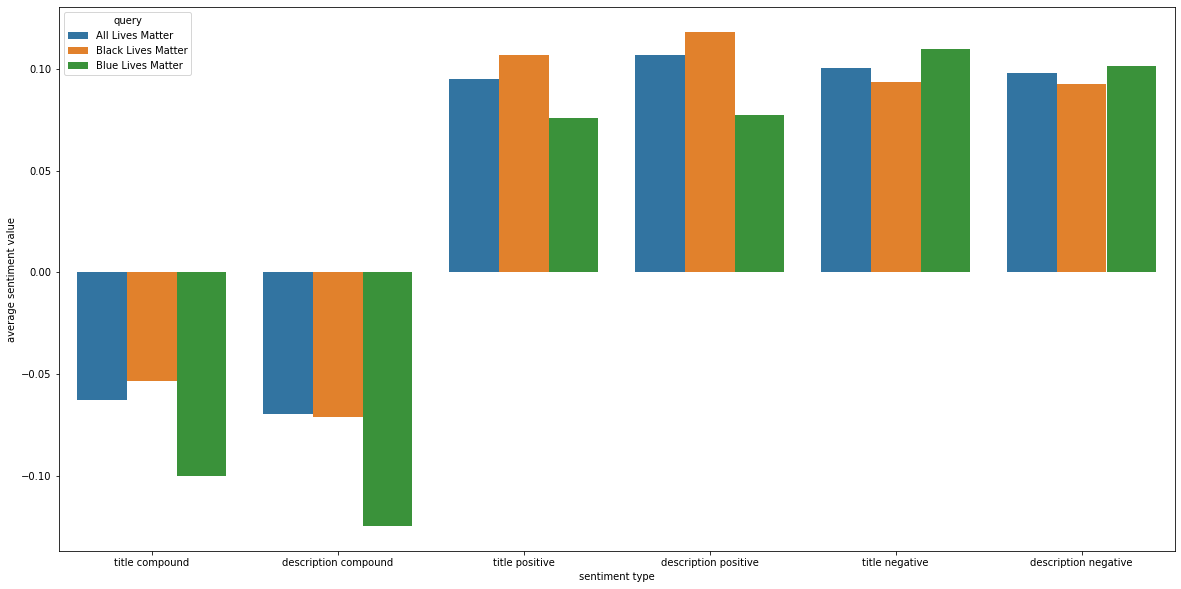

In [15]:
averageSentiment = allData.groupby(['query'])['title compound','description compound', "title positive", "description positive", "title negative", "description negative"].mean().unstack()

averageSentimentDf = pd.DataFrame(averageSentiment).reset_index()
averageSentimentDf = averageSentimentDf.rename(columns={0:"average sentiment value", "level_0": "sentiment type"})
f = plt.figure(figsize=(20,10))
ax = plt.subplot(111)
sns.barplot(x="sentiment type", y= "average sentiment value", data=averageSentimentDf, hue='query')

It appears that in general, Black Lives Matter has slightly better sentiment within the news. On average, for both news titles and brief descriptions, there appear to be significantly higher sentiment values for All Lives Matter and Black Lives Matter compared to Blue Lives Matter. Furthermore, negative sentiment values appear to stay consistent with these findings as they are slightly greater for Blue Lives Matter than the other two movements.

In [16]:
def plotData(focus):
    f = plt.figure(figsize=(40,3))
    ax = plt.subplot(111)
#     focus = 'description positive'
    allData['date round'] = [x.strftime('%Y-%m-%d') for x in allData['date']]
    allData[allData['date round'] > '2020-06-14'].groupby('query').plot(x='date', y=focus, ax = ax)
    plt.ylabel(focus + ' sentiment')
    plt.title(focus + " over the past month")
    plt.xlabel("Date")
    plt.title(focus + " over the past month")
    plt.legend(['All Lives Matter', "Black Lives Matter", 'Blue Lives Matter'])

In [17]:
def plotDataRollingAverages(focus):
    f = plt.figure(figsize=(15,3))
    ax = plt.subplot(111)
    allData['date round'] = [x.strftime('%Y-%m-%d') for x in allData['date']]
    allData[allData['date round'] > '2020-06-13'].groupby(['query','date round'])[focus].mean().reset_index().groupby('query').plot(x='date round', y=focus, ax = ax)
    plt.legend(['All Lives Matter', "Black Lives Matter", 'Blue Lives Matter'])
    plt.ylabel(focus + ' sentiment')
    plt.xlabel("Date")
    plt.title("Rolling averages of " + focus + " over the past month")

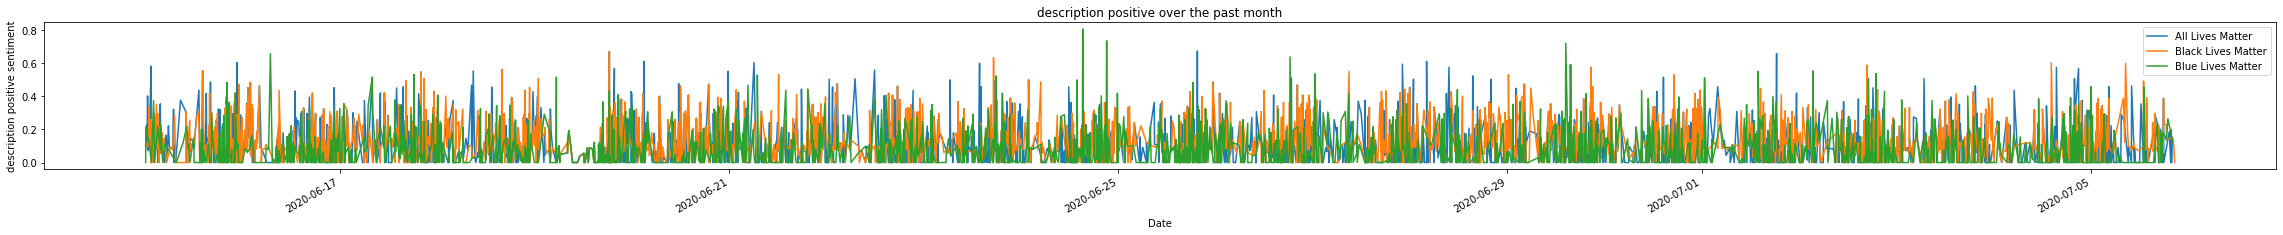

In [18]:
plotData('description positive')

It very difficult to find conclusions based on graphing all sentiment values for every article in the dataset I created. Thus, as you will see in future graphs, I decided to use rolling averages to have a clear understanding of how the news has typically reflected all three of these movements.

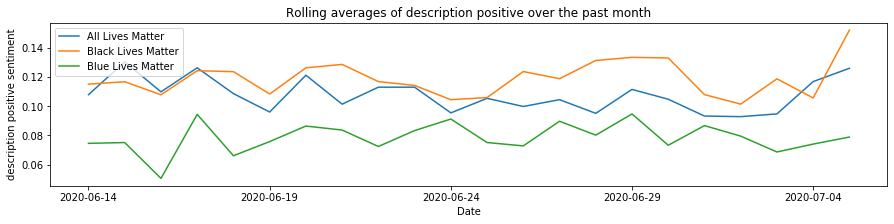

In [19]:
plotDataRollingAverages('description positive')

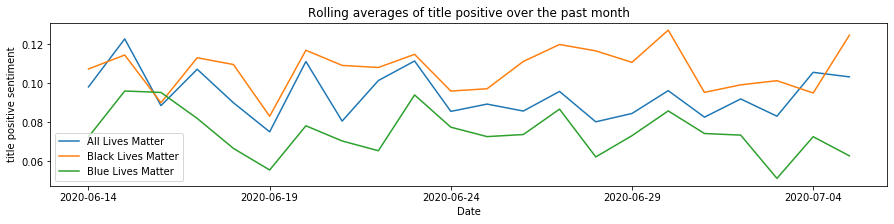

In [20]:
plotDataRollingAverages('title positive')

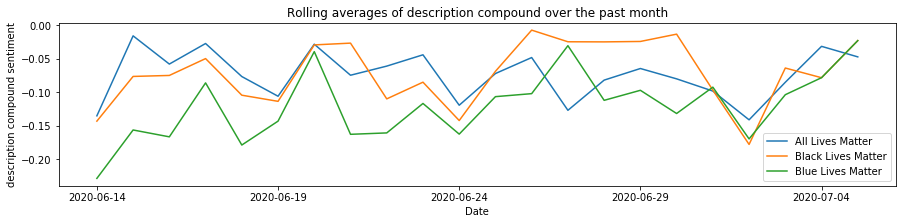

In [21]:
plotDataRollingAverages('description compound')

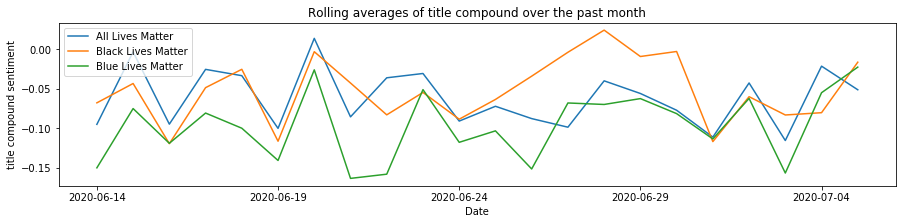

In [22]:
plotDataRollingAverages('title compound')

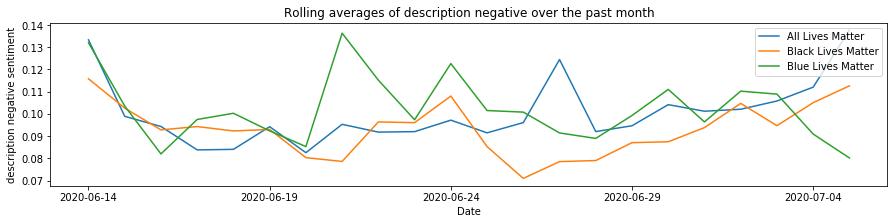

In [23]:
plotDataRollingAverages('description negative')

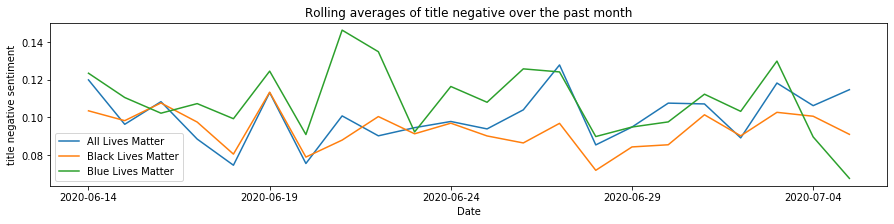

In [24]:
plotDataRollingAverages('title negative')

The rolling average plots came out significantly better than the first plot I created. As you can see, over the past month, All Lives Matter and Black Lives Matter have had larger positive sentiment values than the Blue Lives Matter movement. Alternatively, for negative sentiment values the Blue Lives Matter had signifcantly higher values than All Lives Matter and Black Lives Matter. Overall, by looking at the compound sentiment values, we can see that the news in fact has typically shared better attitudes toward Black Lives Matter than the Blue Lives Matter movement.

Text(0.5, 1.0, 'Article Count per Day')

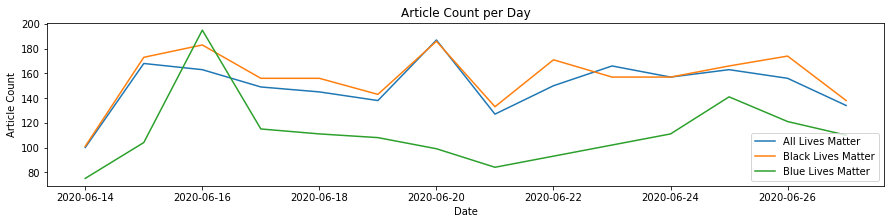

In [25]:
f = plt.figure(figsize=(15,3))
ax = plt.subplot(111)
allData[(allData['date round'] > '2020-06-13') & (allData['date round'] < '2020-06-28')].groupby(['query','date round'])['title compound'].count().reset_index().groupby('query').plot(x='date round', y='title compound', ax = ax)
plt.legend(['All Lives Matter', "Black Lives Matter", 'Blue Lives Matter'])
plt.xlabel("Date")
plt.ylabel("Article Count")
plt.title("Article Count" + " per Day")

This plot shows how many articles were published each day for all three of the movements. Clearly, Blue Lives Matter has received significantly less news time than the other two movements. I would like to look furhter into the peaks we see plotted here. Was there a specific event that happenened on June 16th that sparked the Blue Lives Matter movement being on the news more? Regardless, I am glad to see that the Black Lives Matter movement has received more news articles published on it than the other two movements.

## Conclusion:

From the analyses and visual representations I have created, I found that All Lives Matter and Black Lives Matter wer typically depicted more often and with better than sentiment than the Blue Lives Materr movement. It seems pretty clear that news sources publish Blue Lives Matter articles infrequently. It appears that the attitude for Black Lives Matter is much more positive than that of Blue Lives Matter. I am a bit surprised to see how All Lives Matter compared to the Black Lives Matter movement but believe these relationships might be due to sampling bias. Overall, it is good to see that the Black Lives Matter movement is getting the acknowledgement it deserves and that it is generally being reflected in a positive way.

## Future Considerations:

I hope to find a connection between the news articles released and major events including Black Lives Matter protests and police brutality. More specifically, I believe these spikes in the number of Black Lives Matter news articles and sentiment values that reflect whether the major event was positive or negative. Additionally, I would like to use word to vec to further my analysis.